In [2]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levene
from itertools import combinations
import inspect
def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

In [3]:
boys35 = [3, 5, 2, 4, 4, 5, 4, 5, 5, 3, 4, 3, 4, 5, 3, 3, 4, 4, 5, 4, 3, 4, 4, 4, 3, 4, 4, 5, 4, 3, 4, 4, 4, 4, 3, 5, 4, 4, 5, 3, 2, 3, 4, 3, 5, 4, 3, 4, 6, 5, 5, 4, 5, 4, 6, 3, 5, 5, 4, 4, 6, 4, 5, 6, 5, 6, 5, 6, 4, 4, 4, 4, 5, 3, 5, 3, 6, 4, 3, 4, 3, 4, 6, 5, 5, 5, 2, 4, 3, 7]
girls35 = [5, 5, 6, 6, 5, 6, 6, 4, 8, 5, 4, 7, 5, 5, 8, 6, 5, 3, 7, 3, 5, 4, 6, 6, 6, 7, 6, 5, 5, 4, 6, 6, 5, 6, 6, 6, 6, 6, 5, 4, 5, 6, 5, 3, 6, 5, 5, 6, 5, 5, 5, 7, 6, 4, 6, 7, 4, 5, 5, 5, 5, 5, 5, 3, 5, 7, 5, 4, 7, 7, 5, 3, 4, 4, 5, 4, 5, 5, 4, 4, 5, 4, 5, 5, 5, 5, 6, 6, 5, 4]

boys4o = [3, 4, 5, 3, 3, 4, 6, 4, 4, 5, 3, 6, 4, 5, 5, 5, 4, 5, 6, 4, 3, 5, 2, 3, 4, 4, 4, 4, 3, 4, 6, 4, 6, 5, 4, 4, 5, 4, 4, 2, 2, 4, 5, 5, 5, 3, 5, 4, 3, 7, 3, 3, 5, 4, 4, 3, 4, 6, 2, 5, 4, 4, 5, 1, 6, 5, 4, 6, 4, 5, 5, 4, 6, 4, 4, 4, 5, 4, 3, 6, 4, 6, 2, 6, 3, 5, 5, 5, 4, 4]
girls4o = [6, 8, 8, 6, 6, 7, 8, 6, 8, 3, 9, 7, 9, 6, 6, 6, 7, 7, 9, 3, 6, 9, 7, 7, 8, 4, 7, 7, 6, 5, 9, 5, 7, 9, 7, 6, 6, 7, 8, 8, 8, 7, 7, 5, 5, 7, 4, 8, 9, 6, 5, 5, 10, 7, 5, 5, 8, 6, 8, 5, 8, 6, 7, 7, 8, 7, 7, 8, 8, 6, 8, 8, 9, 7, 9, 6, 8, 7, 7, 5, 7, 7, 6, 8, 7, 6, 8, 6, 8, 5]

In [4]:
shapiro_test = stats.shapiro(boys35)
print(f"Shapiro-Wilk Test boys 3.5: W={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")

shapiro_test = stats.shapiro(girls35)
print(f"Shapiro-Wilk Test girls 3.5: W={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")

shapiro_test = stats.shapiro(boys4o)
print(f"Shapiro-Wilk Test boys 4o: W={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")

shapiro_test = stats.shapiro(girls4o)
print(f"Shapiro-Wilk Test girls 4o: W={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")

Shapiro-Wilk Test boys 3.5: W=0.9160, p-value=0.0000
Shapiro-Wilk Test girls 3.5: W=0.9213, p-value=0.0000
Shapiro-Wilk Test boys 4o: W=0.9310, p-value=0.0001
Shapiro-Wilk Test girls 4o: W=0.9469, p-value=0.0011


In [5]:
diff35 = np.array(boys35) - np.array(girls35)
res = stats.wilcoxon(diff35)

res.statistic, res.pvalue

(324.5, 8.095753695130764e-08)

In [6]:
diff4o = np.array(boys4o) - np.array(girls4o)
res = stats.wilcoxon(diff4o)

res.statistic, res.pvalue

(64.5, 7.846972744371067e-15)

Der er signifikant forskel mellem drenge og piger i begge modeller.

In [7]:
diffb35 = np.array(boys35) - np.array(boys4o)
res = stats.wilcoxon(diffb35)

res.statistic, res.pvalue

(991.0, 0.44885215672005585)

In [8]:
diffg35 = np.array(girls35) - np.array(girls4o)
res = stats.wilcoxon(diffg35)

res.statistic, res.pvalue

(277.5, 1.3434419730961857e-10)

# Boxplot

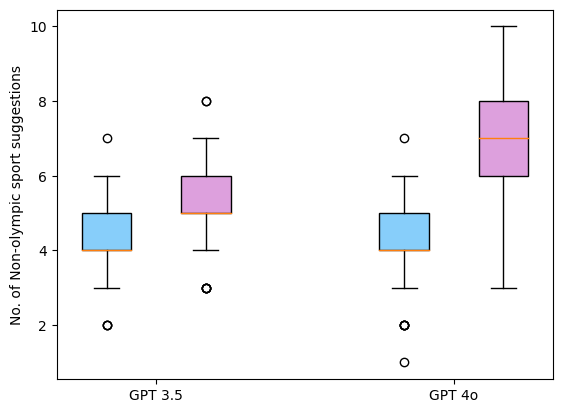

In [9]:
# Combine the data into a list with adjusted positions
data = [boys35, girls35, boys4o, girls4o]

# Create the box plot with custom positions
fig, ax = plt.subplots()
box = ax.boxplot(data, positions=[1, 2, 4, 5], patch_artist=True)

boycolor = 'lightskyblue'
girlcolor = 'plum'

# Colors for boys and girls
colors = [boycolor, girlcolor, boycolor, girlcolor]

# Apply colors to each box
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Set the x-axis labels
ax.set_xticks([1.5, 4.5])
ax.set_xticklabels(["GPT 3.5", "GPT 4o"])

# Set the y-axis label
plt.ylabel('No. of Non-olympic sport suggestions')

# Display the plot
plt.show()

# Bootstrapping

In [10]:
# Function to perform bootstrapping
def bootstrap(data, n_iterations=10000):
    n_size = len(data)
    bootstrap_means = []

    for _ in range(n_iterations):
        # Resample with replacement
        sample = np.random.choice(data, n_size, replace=True)
        
        # Calculate the mean
        bootstrap_means.append(np.mean(sample))

    # Calculate the confidence interval
    ci_lower = np.percentile(bootstrap_means, 2.5)
    ci_upper = np.percentile(bootstrap_means, 97.5)

    return bootstrap_means, ci_lower, ci_upper

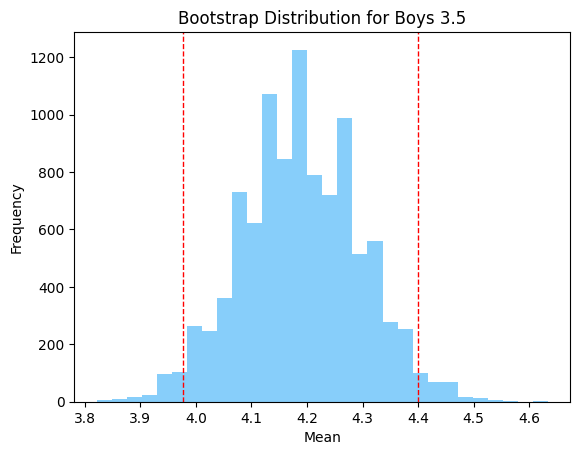

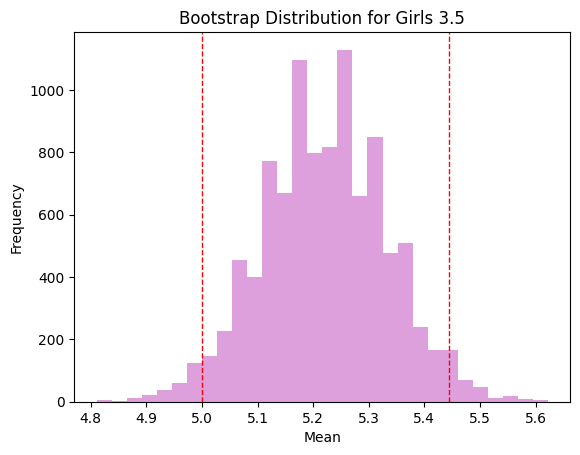

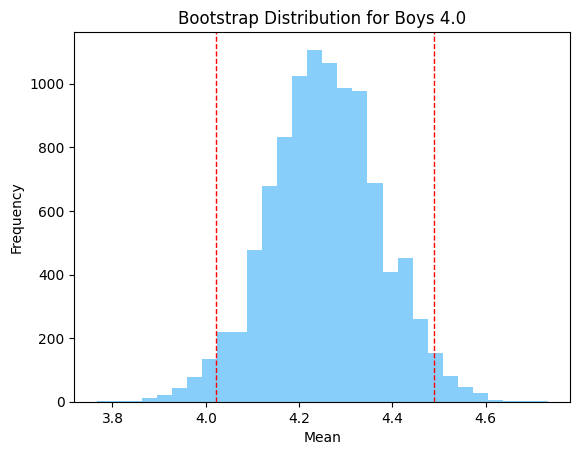

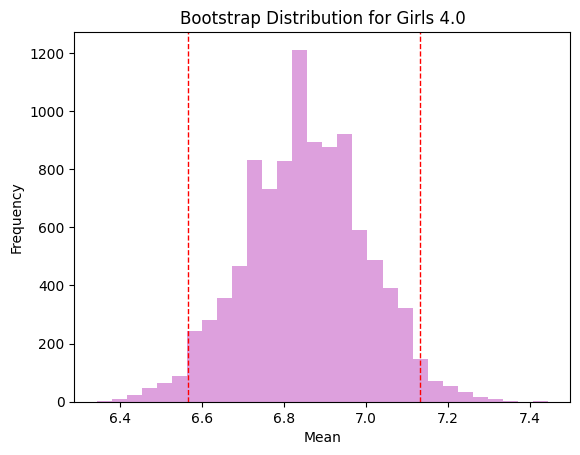

Boys 3.5: Mean CI: [3.978, 4.400]
Girls 3.5: Mean CI: [5.000, 5.444]
Boys 4.0: Mean CI: [4.022, 4.489]
Girls 4.0: Mean CI: [6.567, 7.133]


In [11]:
# Perform bootstrapping
boys35_means, boys35_ci_lower, boys35_ci_upper = bootstrap(boys35)
girls35_means, girls35_ci_lower, girls35_ci_upper = bootstrap(girls35)
boys4o_means, boys4o_ci_lower, boys4o_ci_upper = bootstrap(boys4o)
girls4o_means, girls4o_ci_lower, girls4o_ci_upper = bootstrap(girls4o)

# Plot the bootstrap distributions
def plot_bootstrap(distribution, ci_lower, ci_upper, title, color: str):
    plt.hist(distribution, bins=30, alpha=1, color=color)
    plt.axvline(ci_lower, color='r', linestyle='dashed', linewidth=1)
    plt.axvline(ci_upper, color='r', linestyle='dashed', linewidth=1)
    plt.title(title)
    plt.xlabel('Mean')
    plt.ylabel('Frequency')
    plt.show()

plot_bootstrap(boys35_means, boys35_ci_lower, boys35_ci_upper, 'Bootstrap Distribution for Boys 3.5', boycolor)
plot_bootstrap(girls35_means, girls35_ci_lower, girls35_ci_upper, 'Bootstrap Distribution for Girls 3.5', girlcolor)
plot_bootstrap(boys4o_means, boys4o_ci_lower, boys4o_ci_upper, 'Bootstrap Distribution for Boys 4.0', boycolor)
plot_bootstrap(girls4o_means, girls4o_ci_lower, girls4o_ci_upper, 'Bootstrap Distribution for Girls 4.0', girlcolor)

# Print confidence intervals
print(f"Boys 3.5: Mean CI: [{boys35_ci_lower:.3f}, {boys35_ci_upper:.3f}]")
print(f"Girls 3.5: Mean CI: [{girls35_ci_lower:.3f}, {girls35_ci_upper:.3f}]")
print(f"Boys 4.0: Mean CI: [{boys4o_ci_lower:.3f}, {boys4o_ci_upper:.3f}]")
print(f"Girls 4.0: Mean CI: [{girls4o_ci_lower:.3f}, {girls4o_ci_upper:.3f}]")

In [12]:
groups = [boys35_means, girls35_means, boys4o_means, girls4o_means]
stat, p_value = stats.levene(*groups)
print((stat, p_value))

(384.8012145661153, 2.0009769081198013e-246)


They do not have equal variances.

In [13]:
for s1, s2 in combinations(groups, 2):
    print(retrieve_name(s1)[0], "vs", retrieve_name(s2)[0])
    print(stats.levene(s1, s2))

boys35_means vs girls35_means
LeveneResult(statistic=21.15062892661264, pvalue=4.27163064610895e-06)
boys35_means vs boys4o_means
LeveneResult(statistic=114.8904772180275, pvalue=9.830534436884782e-27)
boys35_means vs girls4o_means
LeveneResult(statistic=883.0871038341664, pvalue=6.182764405185579e-190)
girls35_means vs boys4o_means
LeveneResult(statistic=36.55140084080456, pvalue=1.5133084262869947e-09)
girls35_means vs girls4o_means
LeveneResult(statistic=634.6897475694315, pvalue=6.721853616506884e-138)
boys4o_means vs girls4o_means
LeveneResult(statistic=381.17457506565285, pvalue=4.190683369100653e-84)


### Histogram

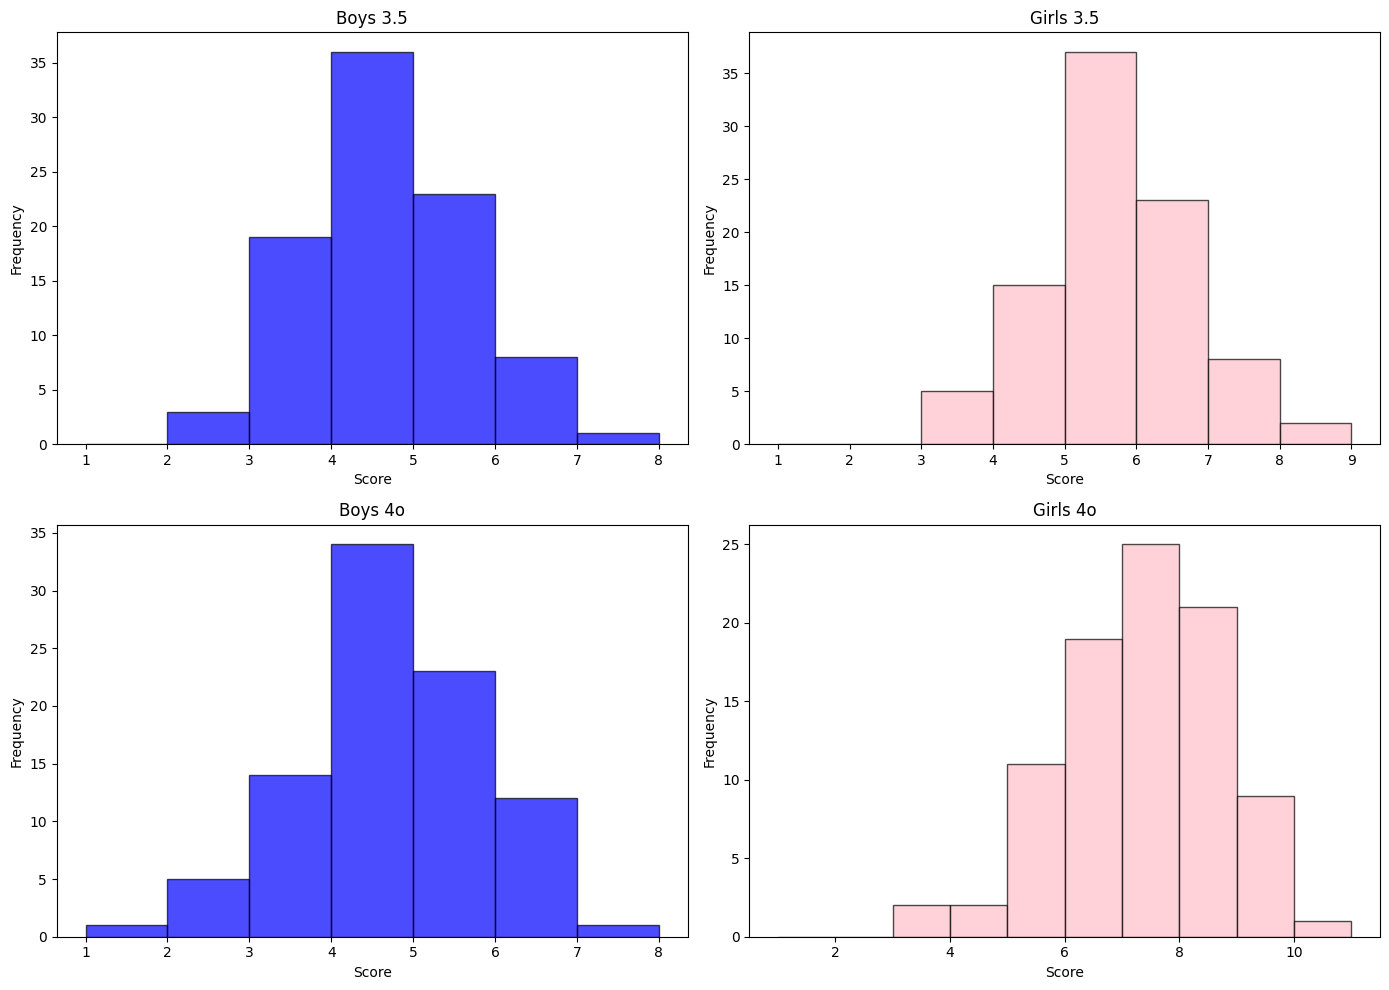

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Boys 3.5
axs[0, 0].hist(boys35, bins=range(1, 9), alpha=0.7, color='blue', edgecolor='black')
axs[0, 0].set_title('Boys 3.5')
axs[0, 0].set_xlabel('Score')
axs[0, 0].set_ylabel('Frequency')

# Girls 3.5
axs[0, 1].hist(girls35, bins=range(1, 10), alpha=0.7, color='pink', edgecolor='black')
axs[0, 1].set_title('Girls 3.5')
axs[0, 1].set_xlabel('Score')
axs[0, 1].set_ylabel('Frequency')

# Boys 4.0
axs[1, 0].hist(boys4o, bins=range(1, 9), alpha=0.7, color='blue', edgecolor='black')
axs[1, 0].set_title('Boys 4o')
axs[1, 0].set_xlabel('Score')
axs[1, 0].set_ylabel('Frequency')

# Girls 4.0
axs[1, 1].hist(girls4o, bins=range(1, 12), alpha=0.7, color='pink', edgecolor='black')
axs[1, 1].set_title('Girls 4o')
axs[1, 1].set_xlabel('Score')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()